In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [5]:
base_model=VGG19(
    include_top=False,
    weights='imagenet',
    input_shape=(32,32,3)
)

80134624/80134624 [==============================] - 0s 0us/step


In [6]:
for layer in base_model.layers:
  layer.trainable = False

In [7]:
model=Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256,activation=('relu')))
model.add(Dense(10,activation=('softmax')))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 20,158,282
Trainable params: 133,898
Non-trainable params: 20,024,384
_________________________________________________________________


In [9]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [11]:
model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[learning_rate_reduction])

Epoch 1/50
782/782 [==============================] - 24s 17ms/step - loss: 1.4148 - accuracy: 0.5039 - val_loss: 1.2930 - val_accuracy: 0.5419 - lr: 0.0010
Epoch 2/50
782/782 [==============================] - 13s 16ms/step - loss: 1.2332 - accuracy: 0.5666 - val_loss: 1.2384 - val_accuracy: 0.5663 - lr: 0.0010
Epoch 3/50
782/782 [==============================] - 13s 16ms/step - loss: 1.1732 - accuracy: 0.5857 - val_loss: 1.1995 - val_accuracy: 0.5800 - lr: 0.0010
Epoch 4/50
782/782 [==============================] - 14s 18ms/step - loss: 1.1266 - accuracy: 0.6048 - val_loss: 1.1786 - val_accuracy: 0.5851 - lr: 0.0010
Epoch 5/50
782/782 [==============================] - 14s 18ms/step - loss: 1.0901 - accuracy: 0.6172 - val_loss: 1.1810 - val_accuracy: 0.5874 - lr: 0.0010
Epoch 6/50
782/782 [==============================] - 13s 17ms/step - loss: 1.0592 - accuracy: 0.6286 - val_loss: 1.1473 - val_accuracy: 0.5961 - lr: 0.0010
Epoch 7/50
782/782 [==============================] - 13s 

In [12]:
import pandas as pd
metrics = pd.DataFrame(model.history.history)

<Axes: >

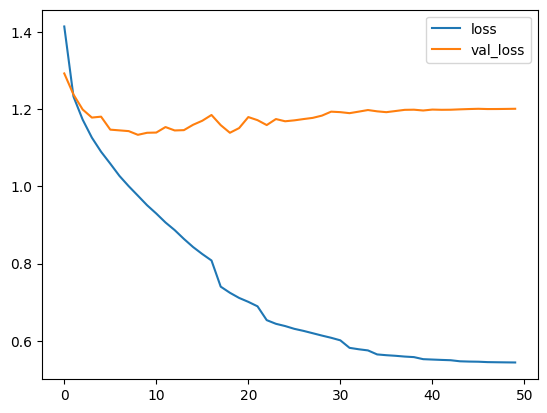

In [13]:
metrics[['loss','val_loss']].plot()

<Axes: >

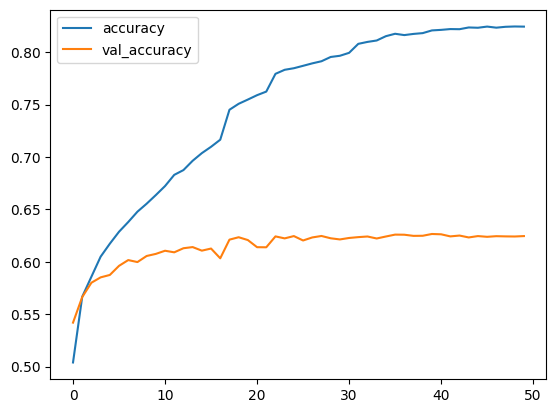

In [14]:
metrics[['accuracy','val_accuracy']].plot()

In [15]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
x_test_predictions = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 3s 9ms/step


In [16]:
print(confusion_matrix(y_test,x_test_predictions))
print(classification_report(y_test,x_test_predictions))

[[721  29  49  19  19  12  11  16  91  33]
 [ 30 695  16  29  11  13  17  12  44 133]
 [ 63  16 513  85  84  62 100  40  25  12]
 [ 17  44  73 459  51 142  91  45  32  46]
 [ 28  19  71  65 565  54  88  73  20  17]
 [ 16  26  65 166  55 522  58  65   7  20]
 [  7  19  55  59  70  51 699  10  18  12]
 [ 20  15  47  51  76  59  16 682   8  26]
 [ 85  65  18  22  17   7   9   8 724  45]
 [ 40 128   9  26   8  24  23  26  51 665]]
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1000
           1       0.66      0.69      0.68      1000
           2       0.56      0.51      0.54      1000
           3       0.47      0.46      0.46      1000
           4       0.59      0.56      0.58      1000
           5       0.55      0.52      0.54      1000
           6       0.63      0.70      0.66      1000
           7       0.70      0.68      0.69      1000
           8       0.71      0.72      0.72      1000
           9       0.66     